# Raman

Első csúcs paraméterei: Amplitúdó = 0.390, f0 = 38.542 THz, FWHM = 0.298 THz
Második csúcs paraméterei: Amplitúdó = 0.309, f0 = 41.598 THz, FWHM = 0.213 THz


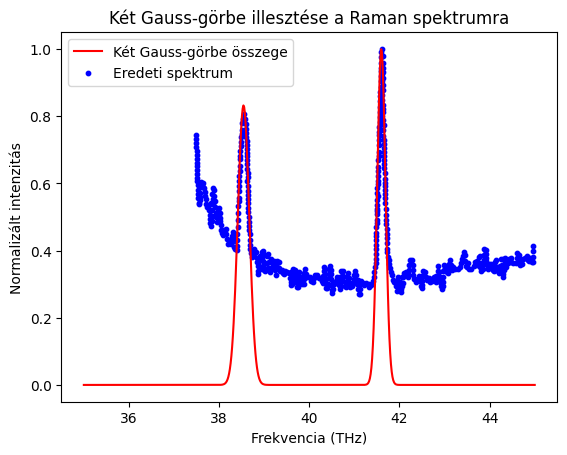

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Adat betöltése
data = np.genfromtxt("co2.csv", delimiter=",", skip_header=1)
raman_shift = data[:, 0]
intensity = data[:, 1]
maximum = np.max(intensity)
intensity /= maximum

# Átváltás cm⁻¹ → THz
c_cm_per_s = 29979245800  # cm/s
freq_measured = (raman_shift * c_cm_per_s) * 1e-12  # THz

# Lorentz-görbe definíciója
def lorentz(f, A, f0, gamma):
    return (A / np.pi) * (0.5*gamma) / ((f - f0)**2 + (0.5*gamma)**2)

# Két kivágott tartomány (állítsd be pontosan)
range1 = (38.39, 38.7)
range2 = (41.5, 41.7)

# Adat kivágása az első csúcshoz
mask1 = (freq_measured >= range1[0]) & (freq_measured <= range1[1])
freq1 = freq_measured[mask1]
intensity1 = intensity[mask1]

# Adat kivágása a második csúcshoz
mask2 = (freq_measured >= range2[0]) & (freq_measured <= range2[1])
freq2 = freq_measured[mask2]
intensity2 = intensity[mask2]

# Kezdeti becslések az illesztéshez (állítsd be az értékeket az adatok alapján)
p0_1 = [max(intensity1), freq1[np.argmax(intensity1)], 0.02]
p0_2 = [max(intensity2), freq2[np.argmax(intensity2)], 0.02]

# Illesztés
popt1, pcov1 = curve_fit(lorentz, freq1, intensity1, p0=p0_1, maxfev=5000)
popt2, pcov2 = curve_fit(lorentz, freq2, intensity2, p0=p0_2, maxfev=5000)

# Illesztett görbék
fit1 = lorentz(freq1, *popt1)
fit2 = lorentz(freq2, *popt2)

'''
# Eredmény megjelenítése
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(freq1, intensity1, 'b.', label='Adat (csúcs 1)')
plt.plot(freq1, fit1, 'r-', label='Lorentz illesztés')
plt.xlabel('Frekvencia (THz)')
plt.ylabel('Normalizált intenzitás')
plt.title('Első csúcs illesztése')
plt.legend()

plt.subplot(1,2,2)
plt.plot(freq2, intensity2, 'b.', label='Adat (csúcs 2)')
plt.plot(freq2, fit2, 'r-', label='Lorentz illesztés')
plt.xlabel('Frekvencia (THz)')
plt.ylabel('Normalizált intenzitás')
plt.title('Második csúcs illesztése')
plt.legend()

plt.tight_layout()
plt.show()
'''

# Kiíratás, ha érdekelnek az illesztett paraméterek:
print("Első csúcs paraméterei: Amplitúdó = {:.3f}, f0 = {:.3f} THz, FWHM = {:.3f} THz".format(*popt1))
print("Második csúcs paraméterei: Amplitúdó = {:.3f}, f0 = {:.3f} THz, FWHM = {:.3f} THz".format(*popt2))

# Gauss függvény definíciója
def gauss(f, A, f0, FWHM):
    sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))
    return A * np.exp(- (f - f0)**2 / (2 * sigma**2))

# Paraméterek (a te megadott értékeid)
A1, f01, FWHM1 = 0.832, 38.542, 0.298
A2, f02, FWHM2 = 1, 41.598, 0.213

# Frekvencia tartomány, amin a görbéket ábrázoljuk
f = np.linspace(35, 45, 600)  # vagy a spektrumod frekvenciatartománya

# Két Gauss-görbe összege
fit = gauss(f, A1, f01, FWHM1) + gauss(f, A2, f02, FWHM2)

# Feltételezem, hogy az 'frekvencia' és 'intenzitas' változóid tartalmazzák az adatokat
# plt.plot(frekvencia, intenzitas, label='Eredeti spektrum')
# Az eredeti adatokat cseréld be a saját változóidra

plt.plot(f, fit, 'r-', label='Két Gauss-görbe összege')
plt.scatter(freq_measured, intensity, s=10, c='b', label='Eredeti spektrum')
plt.xlabel('Frekvencia (THz)')
plt.ylabel('Normalizált intenzitás')
plt.title('Két Gauss-görbe illesztése a Raman spektrumra')
plt.legend()
plt.show()

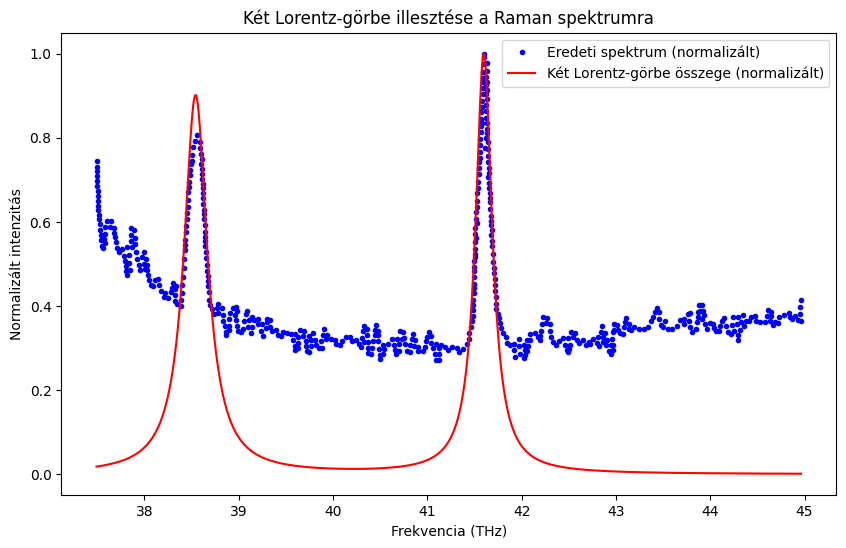

Első csúcs paraméterei: Amplitúdó = 0.390, f0 = 38.542 THz, FWHM = 0.298 THz
Második csúcs paraméterei: Amplitúdó = 0.309, f0 = 41.598 THz, FWHM = 0.213 THz


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Adat betöltése
data = np.genfromtxt("co2.csv", delimiter=",", skip_header=1)
raman_shift = data[:, 0]
intensity = data[:, 1]
intensity /= np.max(intensity)  # normalizálás max értékre

# Átváltás cm⁻¹ → THz
c_cm_per_s = 29979245800  # cm/s
freq_measured = (raman_shift * c_cm_per_s) * 1e-12  # THz

# Lorentz-görbe definíciója
def lorentz(f, A, f0, gamma):
    return (A / np.pi) * (0.5 * gamma) / ((f - f0)**2 + (0.5 * gamma)**2)

# Két kivágott tartomány
range1 = (38.39, 38.7)
range2 = (41.5, 41.7)

# Adat kivágása az első csúcshoz
mask1 = (freq_measured >= range1[0]) & (freq_measured <= range1[1])
freq1 = freq_measured[mask1]
intensity1 = intensity[mask1]

# Adat kivágása a második csúcshoz
mask2 = (freq_measured >= range2[0]) & (freq_measured <= range2[1])
freq2 = freq_measured[mask2]
intensity2 = intensity[mask2]

# Kezdeti becslések az illesztéshez
p0_1 = [max(intensity1), freq1[np.argmax(intensity1)], 0.02]
p0_2 = [max(intensity2), freq2[np.argmax(intensity2)], 0.02]

# Illesztés
popt1, pcov1 = curve_fit(lorentz, freq1, intensity1, p0=p0_1, maxfev=10000)
popt2, pcov2 = curve_fit(lorentz, freq2, intensity2, p0=p0_2, maxfev=10000)

# Frekvencia tartomány az ábrázoláshoz
f = np.linspace(freq_measured.min(), freq_measured.max(), 2**10)

# Két Lorentz görbe összege
fit = lorentz(f, *popt1) + lorentz(f, *popt2)

# Normalizáljuk az illesztett görbét is max 1-re
fit /= np.max(fit)

# Ábrázolás
plt.figure(figsize=(10,6))
plt.plot(freq_measured, intensity, 'b.', label='Eredeti spektrum (normalizált)')
plt.plot(f, fit, 'r-', label='Két Lorentz-görbe összege (normalizált)')
plt.xlabel('Frekvencia (THz)')
plt.ylabel('Normalizált intenzitás')
plt.title('Két Lorentz-görbe illesztése a Raman spektrumra')
plt.legend()
plt.show()

# Illesztett paraméterek kiíratása
print("Első csúcs paraméterei: Amplitúdó = {:.3f}, f0 = {:.3f} THz, FWHM = {:.3f} THz".format(*popt1))
print("Második csúcs paraméterei: Amplitúdó = {:.3f}, f0 = {:.3f} THz, FWHM = {:.3f} THz".format(*popt2))


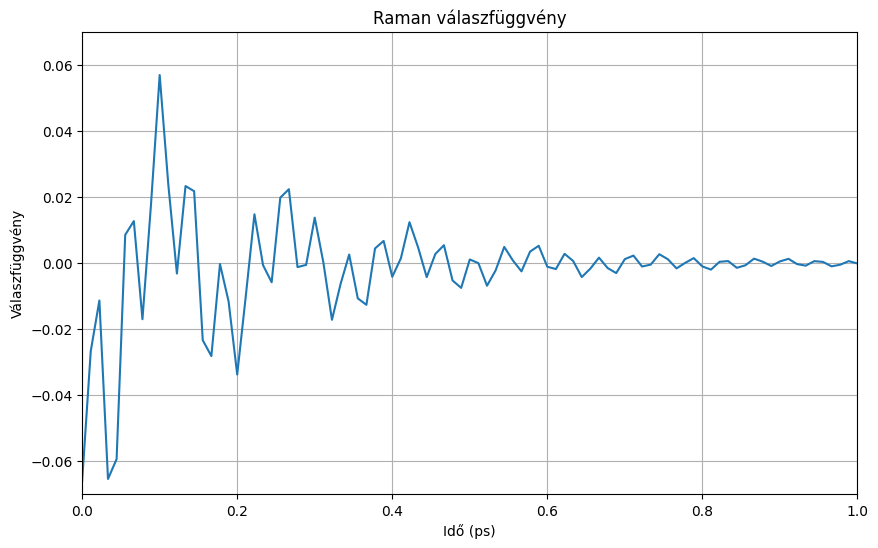

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fft import ifft, fftshift, ifftshift, fftfreq

# Frekvencia (THz), negatívtól pozitívig

f_full = np.linspace(-freq_measured.max(), freq_measured.max(), 2*2**10-1)  # egyenletesen

# Képzetes rész (Lorentz-görbék összege ±f-re antiszimmetrikusan)
Im_chi_full = np.concatenate([-fit[::-1], fit[1:]])  # elkerülve duplázódást 0-nál

# Valós rész Hilbert-transzformációval
analytic = hilbert(Im_chi_full)
Re_chi_full = np.real(analytic)
chi_complex = Re_chi_full + 1j * Im_chi_full

# Középre kell hozni a frekvenciaspektrumot (ha nem középen van)
chi_complex_shifted = ifftshift(chi_complex)

# Inverz Fourier-transzformáció
chi_t = ifft(chi_complex_shifted)

# Időtengely (ps)
N = len(f_full)
df = f_full[1] - f_full[0]
dt = 1 / (N * df)
t = np.arange(-N//2, N//2) * dt

# Shifteljük a válaszfüggvényt középre
chi_t_shifted = fftshift(chi_t)

# Csak a pozitív időtartomány és adott skála
mask = (t >= 0)

# Ábrázolás
plt.figure(figsize=(10,6))
plt.plot(t[mask], np.real(chi_t_shifted)[mask])
plt.xlim(0, 1)
plt.ylim(-0.07, 0.07)
plt.xlabel("Idő (ps)")
plt.ylabel("Válaszfüggvény")
plt.title("Raman válaszfüggvény")
plt.grid()
plt.show()

Illesztett paraméterek:
A1 = 0.04292
A2 = 0.05394
gamma1 = 4.04512
gamma2 = 5.73287
w1 = 155.29689
w2 = 39.71505
phi1 = 1.72437
phi2 = 0.44010


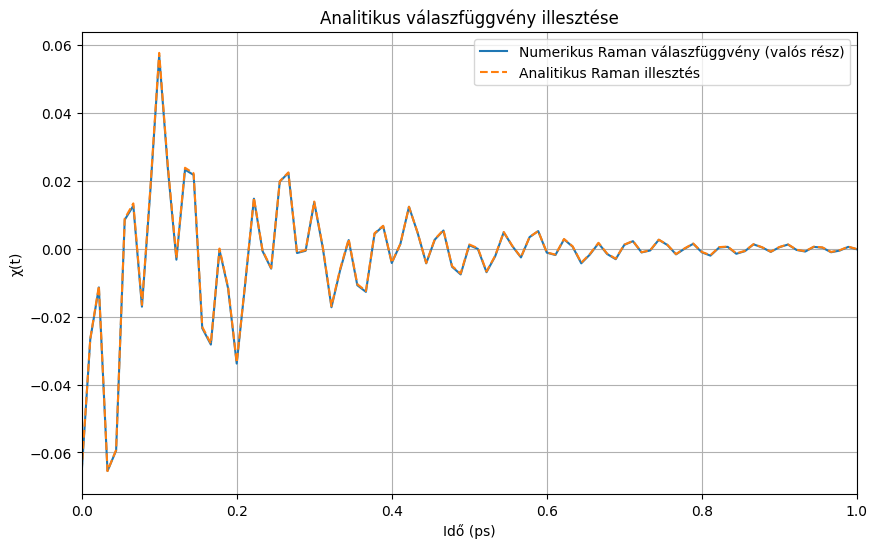

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

# ===== Analitikus válaszfüggvény =====
def response_function(t, A1, A2, gamma1, gamma2, w1, w2, phi1, phi2):
    y = np.zeros_like(t)
    mask = t >= 0
    y[mask] = (
        -A1 * np.exp(-gamma1 * t[mask]) * np.sin(w1 * t[mask] + phi1) +
        -A2 * np.exp(-gamma2 * t[mask]) * np.sin(w2 * t[mask] + phi2)
    )
    return y


# ===== Illesztésre használt adatok =====
t_fit = t[t >= 0]                        # csak pozitív idő
chi_real_fit = np.real(chi_t_shifted)[t >= 0]  # valós rész

# ===== Kezdeti paraméterbecslések =====
A1_0 = popt1[0]
A2_0 = popt2[0]
gamma1_0 = popt1[2]  # első Lorentz-csúcs FWHM
gamma2_0 = popt2[2]  # második Lorentz-csúcs FWHM
w1_0 = 2 * np.pi * popt1[1]  # THz → rad/ps
w2_0 = 2 * np.pi * popt2[1]
phi1_0 = 0
phi2_0 = 0

p0 = [A1_0, A2_0, gamma1_0, gamma2_0, w1_0, w2_0, phi1_0, phi2_0]

# ===== Illesztés futtatása =====
popt, pcov = curve_fit(response_function, t_fit, chi_real_fit, p0=p0, maxfev =10000)

# ===== Eredmény kiírása =====
param_nevek = ["A1", "A2", "gamma1", "gamma2", "w1", "w2", "phi1", "phi2"]
print("Illesztett paraméterek:")
for name, value in zip(param_nevek, popt):
    print(f"{name} = {value:.5f}")

# ===== Modell ábrázolása =====
plt.figure(figsize=(10,6))
plt.plot(t_fit, chi_real_fit, label="Numerikus Raman válaszfüggvény (valós rész)")
plt.plot(t_fit, response_function(t_fit, *popt), '--', label="Analitikus Raman illesztés")
plt.xlim(0,1)
plt.xlabel("Idő (ps)")
plt.ylabel("χ(t)")
plt.title("Analitikus válaszfüggvény illesztése")
plt.legend()
plt.grid(True)
plt.show()
